# Features used: Temp(°C)	DewPoint(°C)	Short_wave_radiation_flux
# Target: SST

In [1]:
#Import libraries here
import inspect
import time
from pprint import PrettyPrinter

import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
path = r"C:\Users\hp\Research-Try-ML\NATO-RESULTS\NATO-RESULTS.csv"
df = pd.read_csv(path, encoding='latin1')
df.set_index('Date', inplace=True)
#Change Datetime Datatype to Datetime
df.index = pd.to_datetime(df.index)
df.head()

,Temp(°C),DewPoint(°C),Humidi(%),WindSpeed(mps),Press(hpa),SST(°C),Precipitation,Cloud_Fraction,Long_wave_radiation_flux,Short_wave_radiation_flux
Date,,,,,,,,,,
2008-01-01,10.555556,1.833333,62.4,2.726866,1009.14422,18.5,1.319460,0.9892,-54.527946,76.365265
2008-01-02,10.333333,7.944444,85.6,2.011623,1009.14422,18.3,0.956984,0.8545,-25.521553,45.635708
2008-01-03,10.611111,6.166667,75.3,2.235136,1009.14422,18.7,0.164835,0.5460,-62.328209,64.631103
2008-01-04,9.166667,-6.888889,36.2,8.582924,1012.53061,19.1,0.097520,0.2037,-112.145699,111.238106
2008-01-05,8.055556,-8.333333,31.4,8.717032,1019.30339,18.8,0.000000,0.3031,-121.402390,112.684929


In [3]:
df.corr()

,Temp(°C),DewPoint(°C),Humidi(%),WindSpeed(mps),Press(hpa),SST(°C),Precipitation,Cloud_Fraction,Long_wave_radiation_flux,Short_wave_radiation_flux
Temp(°C),1.000000,0.740068,-0.274086,-0.131474,-0.601415,0.883242,-0.134767,-0.544908,-0.314894,0.758334
DewPoint(°C),0.740068,1.000000,0.427911,-0.484196,-0.523407,0.673211,0.001065,-0.189917,0.181872,0.476018
Humidi(%),-0.274086,0.427911,1.000000,-0.519109,0.049911,-0.226765,0.207379,0.479053,0.701817,-0.357655
WindSpeed(mps),-0.131474,-0.484196,-0.519109,1.000000,-0.080272,-0.136209,0.012028,-0.096286,-0.200449,-0.053393
Press(hpa),-0.601415,-0.523407,0.049911,-0.080272,1.000000,-0.490467,-0.008208,0.206186,0.032918,-0.485060
SST(°C),0.883242,0.673211,-0.226765,-0.136209,-0.490467,1.000000,-0.099808,-0.547265,-0.279132,0.535118
Precipitation,-0.134767,0.001065,0.207379,0.012028,-0.008208,-0.099808,1.000000,0.292132,0.305225,-0.251812
Cloud_Fraction,-0.544908,-0.189917,0.479053,-0.096286,0.206186,-0.547265,0.292132,1.000000,0.632020,-0.579620
Long_wave_radiation_flux,-0.314894,0.181872,0.701817,-0.200449,0.032918,-0.279132,0.305225,0.632020,1.000000,-0.560920
Short_wave_radiation_flux,0.758334,0.476018,-0.357655,-0.053393,-0.485060,0.535118,-0.251812,-0.579620,-0.560920,1.000000


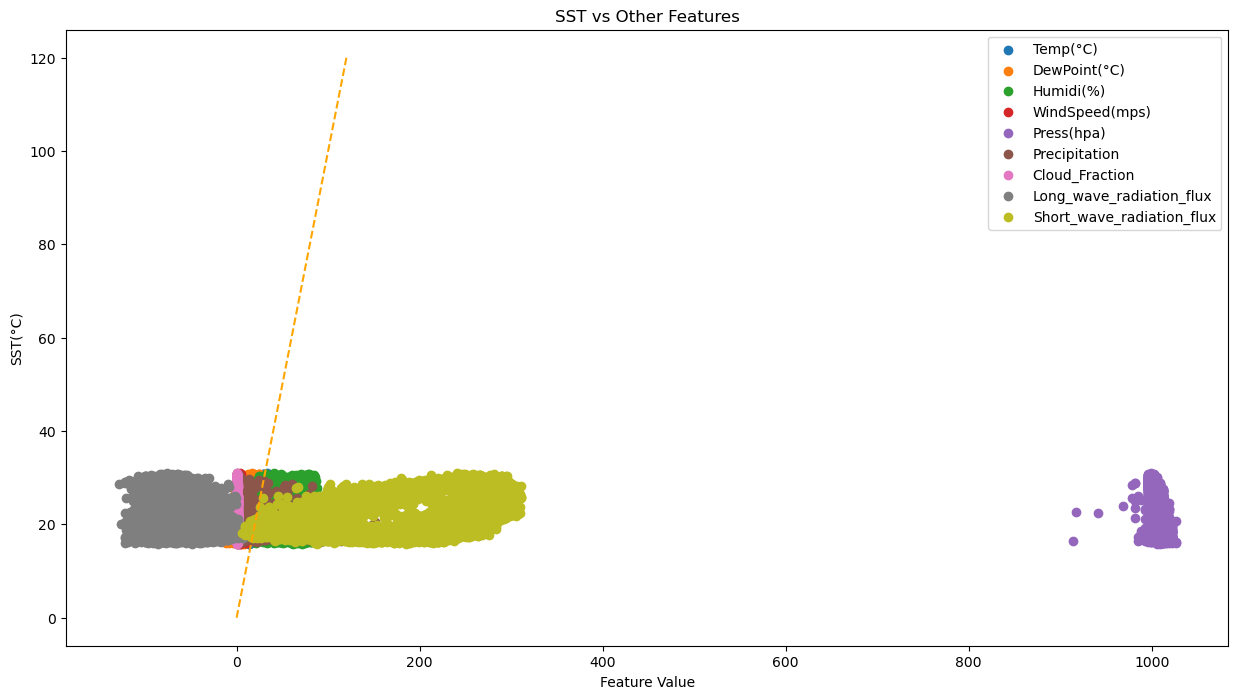

In [4]:
features = ["Temp(°C)", "DewPoint(°C)", "Humidi(%)", "WindSpeed(mps)", "Press(hpa)", "Precipitation", "Cloud_Fraction", "Long_wave_radiation_flux",	"Short_wave_radiation_flux"]

fig, ax = plt.subplots(figsize=(15, 8))

for feature in features:
    ax.scatter(x=df[feature], y=df["SST(°C)"], label=feature)

ax.plot([0, 120], [0, 120], linestyle="--", color="orange")
plt.xlabel("Feature Value")
plt.ylabel("SST(°C)")
plt.title("SST vs Other Features")
plt.legend()
plt.show()

In [5]:
features_to_keep = ["Temp(°C)", "DewPoint(°C)", "Short_wave_radiation_flux"]
df = df[features_to_keep + ["SST(°C)"]]
df

,Temp(°C),DewPoint(°C),Short_wave_radiation_flux,SST(°C)
Date,,,,
2008-01-01,10.555556,1.833333,76.365265,18.5
2008-01-02,10.333333,7.944444,45.635708,18.3
2008-01-03,10.611111,6.166667,64.631103,18.7
2008-01-04,9.166667,-6.888889,111.238106,19.1
2008-01-05,8.055556,-8.333333,112.684929,18.8
...,...,...,...,...
2023-12-27,15.055556,7.833333,30.750456,21.0
2023-12-28,15.555556,6.333333,90.471634,20.8
2023-12-29,13.222222,7.444444,106.396286,20.8


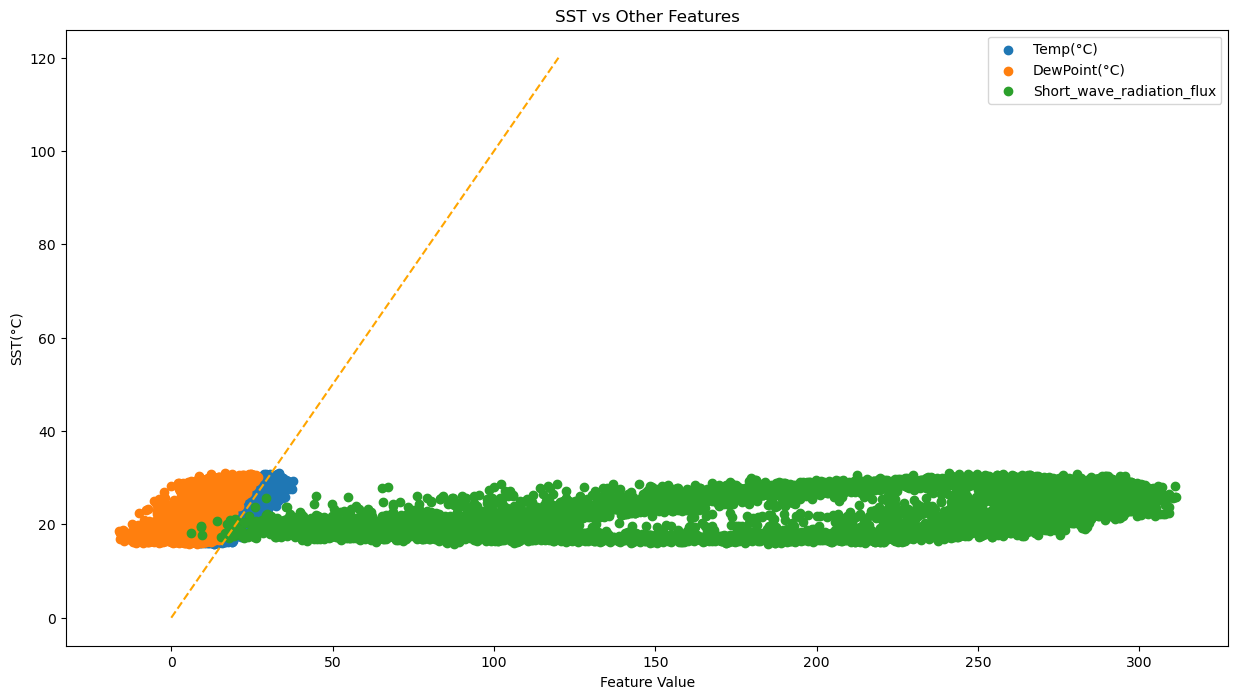

In [6]:
features = ["Temp(°C)", "DewPoint(°C)", "Short_wave_radiation_flux"]

fig, ax = plt.subplots(figsize=(15, 8))

for feature in features:
    ax.scatter(x=df[feature], y=df["SST(°C)"], label=feature)

ax.plot([0, 120], [0, 120], linestyle="--", color="orange")
plt.xlabel("Feature Value")
plt.ylabel("SST(°C)")
plt.title("SST vs Other Features")
plt.legend()
plt.show()

In [7]:
target = "SST(°C)"
y = df[target]
X = df.drop(columns=target)

In [8]:
cutoff = int(len(X) * 0.80)

X_train, y_train = X.iloc[:cutoff], y.iloc[:cutoff]
X_test, y_test = X.iloc[cutoff:], y.iloc[cutoff:]

In [9]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

In [11]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [12]:
training_mae = mean_absolute_error(y_train, model.predict(X_train))
test_mae = mean_absolute_error(y_test, model.predict(X_test))
print("Training MAE:", round(training_mae, 2))
print("Test MAE:", round(test_mae, 2))

Training MAE: 0.0
Test MAE: 1.36


In [13]:
df_pred_test = pd.DataFrame(
    {
        "y_test": y_test,
        "y_pred": model.predict(X_test)
    }
)
df_pred_test.head()

,y_test,y_pred
Date,,
2020-10-19,26.0,22.0
2020-10-20,26.3,28.3
2020-10-21,26.1,22.6
2020-10-22,26.2,25.8
2020-10-23,26.2,26.6


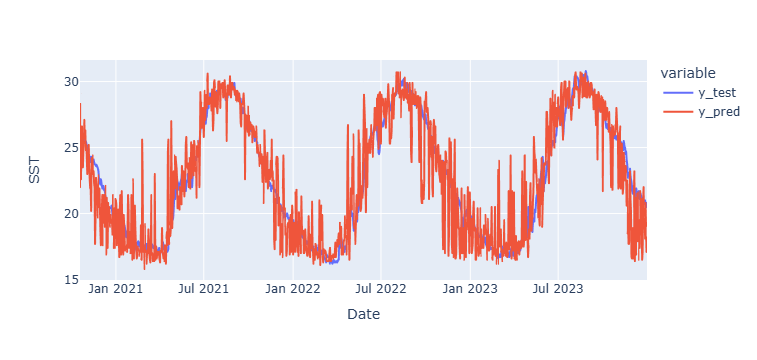

In [16]:
fig = px.line(df_pred_test, labels={"value":"SST"})
fig.show()

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np



# Calculate metrics
test_mae = mean_absolute_error(y_test, model.predict(X_test))

test_mse = mean_squared_error(y_test, model.predict(X_test))
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, model.predict(X_test))

# Print metrics
print(f'Mean Absolute Error (MAE): {test_mae}')
print(f'Mean Squared Error (MSE): {test_mse}')
print(f'Root Mean Squared Error (RMSE): {test_rmse}')
print(f'R-squared (R²): {test_r2}')

Mean Absolute Error (MAE): 1.355945252352438
Mean Squared Error (MSE): 3.867125748502994
Root Mean Squared Error (RMSE): 1.966500889525096
R-squared (R²): 0.7970551699576102
